# Sentiment based on tweet frequency

Most recent sentiment code based on tweet frequency bins

There are 407,489 tweets that need to be split up

Average sentiment for sentiment cleaned tweets

In [1]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Text(0, 0.5, 'Count')

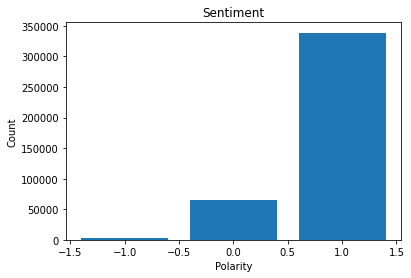

In [2]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
df = df.drop("Unnamed: 0", axis=1)

# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

analyzer = SentimentIntensityAnalyzer()

# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)

# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)

# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()

# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')

In [4]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b..."
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...


# Clean data

In [5]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [6]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet


# Sentiment: apply polarity score

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,"{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...","{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."
...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,"{'neg': 0.153, 'neu': 0.589, 'pos': 0.258, 'co..."


In [10]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,0.000,0.313,0.687,0.6588
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,0.000,0.463,0.537,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",0.000,0.659,0.341,0.8860
...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,0.000,0.328,0.672,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,0.153,0.589,0.258,0.3736


In [11]:
avg_sentiment = df['compound'].mean()
avg_sentiment

0.5566739261864646

## Sentiment: round polarity

In [12]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [13]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,0.000,0.313,0.687,0.6588,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,0.000,0.463,0.537,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",0.000,0.659,0.341,0.8860,1
...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,0.000,0.328,0.672,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,0.153,0.589,0.258,0.3736,1


Text(0.5, 0, 'Tweets')

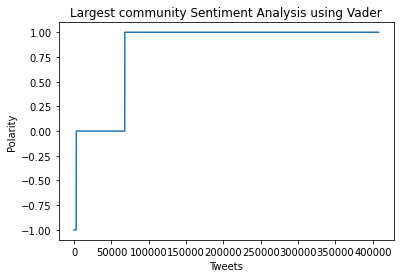

In [14]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [15]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,neg,neu,pos,compound
rounded_polarity,,,,,,,
-1,2889,2889,2889,2889,2889,2889,2889
0,64912,64912,64912,64912,64912,64912,64912
1,338764,338764,338764,338764,338764,338764,338764


Text(0, 0.5, 'Count')

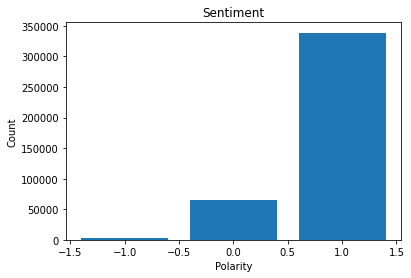

In [16]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')

In [17]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

def get_avg_sentiment(file_name):
    # load cleaned tweet corpus data
    #df = pd.read_csv("../datain/sentiment/cleaned_tweets_include_stopwords_and_not_only_letters.csv")
    df = pd.read_csv(file_name)
    df = df.drop("Unnamed: 0", axis=1)

    # remove all null created_at values from dataframe
    df = df.drop(df[df['created_at'].isnull()].index)
    df = df.drop(df[df['cleaned_tweet'].isnull()].index)
    # ensure that all values in created_at has 2021 (and not random strings)
    df = df[df['created_at'].str.contains("2021")]

    analyzer = SentimentIntensityAnalyzer()

    # add polarity scores to df
    # https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
    pol = lambda x: analyzer.polarity_scores(x)
    df['polarity'] = df["cleaned_tweet"].apply(pol)

    # split polarity scores into separate columns
    df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

    avg_sentiment = df['compound'].mean()
    print(file_name, " has avg sentiment: ", avg_sentiment)
    return avg_sentiment


In [18]:
# get_avg_sentiment("../datain/sentiment/cleaned_tweets_no_cleaning.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../datain/sentiment/cleaned_tweets_no_cleaning.csv'

In [ ]:
get_avg_sentiment("../datain/sentiment/cleaned_tweets_include_stopwords_and_not_only_letters.csv")
get_avg_sentiment("../datain/sentiment/cleaned_tweets_no_stopwords_and_only_letters.csv")